# S&P 500 Sector & Stock Analysis

In [1]:
import pandas_datareader.data as web

import pandas as pd
import datetime 
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np
import plotly.express as px

/Users/Kowsalya/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
sector_df = web.get_sector_performance_av(api_key='ALPHAVANTAGE_API_KEY')
sector_df

,RT,1D,5D,1M,3M,YTD,1Y,3Y,5Y,10Y
Energy,4.34%,4.34%,8.25%,19.87%,-27.85%,-35.43%,-37.45%,-40.51%,-49.91%,-28.81%
Industrials,2.50%,2.50%,1.32%,4.92%,-24.40%,-22.46%,-16.76%,-7.16%,10.79%,103.60%
Materials,2.40%,2.40%,3.40%,11.90%,-12.44%,-14.39%,-3.84%,-1.54%,3.77%,75.73%
Consumer Staples,2.27%,2.27%,0.87%,1.94%,-9.75%,-7.94%,2.06%,5.04%,19.11%,116.40%
Financials,2.19%,2.19%,1.04%,4.54%,-27.88%,-27.73%,-18.70%,-6.54%,12.53%,81.93%
Utilities,2.01%,2.01%,0.53%,1.76%,-18.05%,-13.17%,-2.64%,8.67%,28.46%,93.36%
Real Estate,1.87%,1.87%,1.46%,5.90%,-16.56%,-13.96%,-6.03%,5.55%,NaN,NaN
Consumer Discretionary,1.66%,1.66%,4.43%,15.92%,-6.29%,-3.47%,1.89%,32.70%,58.44%,275.67%
Communication Services,1.57%,1.57%,3.71%,12.76%,-7.76%,-4.08%,5.68%,9.96%,11.76%,69.68%
Information Technology,1.40%,1.40%,6.64%,14.15%,-4.77%,3.37%,23.99%,76.99%,135.61%,370.04%


In [13]:
for col in sector_df.columns:
    sector_df[col] = sector_df[col].str.rstrip('%').astype('float')/100
sector_df.fillna(0, inplace=True)

In [14]:
sector_list = sector_df.index.values.tolist()
sector_col = ['5D', '1M', '3M', 'YTD', '1Y']
sector_bar = []
for col in sector_col:
    sector_bar.append(go.Bar(name=col, x=sector_list, y=sector_df[col].to_list()))
    

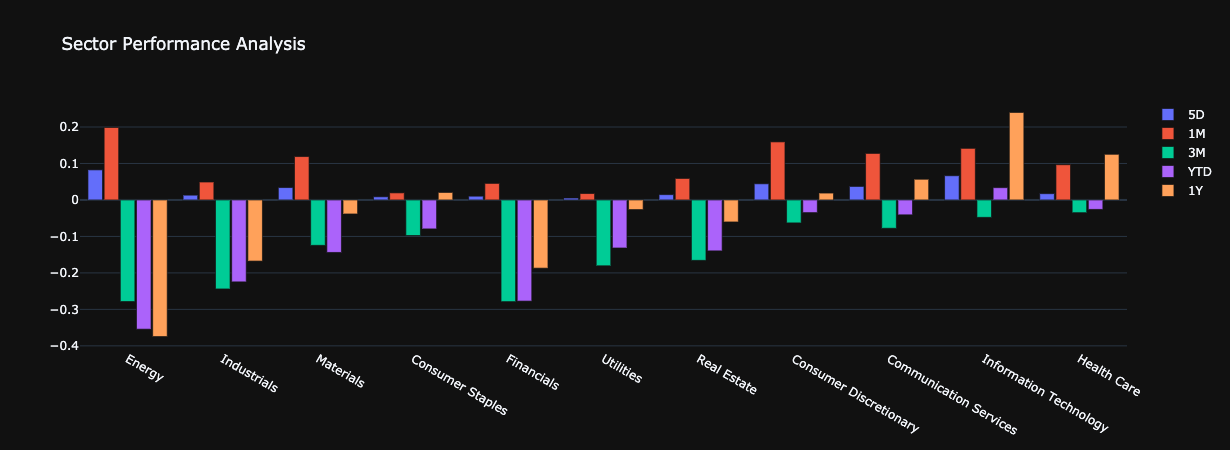

In [15]:
fig = go.Figure(data=sector_bar)


fig.update_layout(
    title='Sector Performance Analysis',
    template='plotly_dark',
    xaxis_tickfont_size=12,
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)

fig.show()

# Sector Correlation

In [21]:
corr_df= sector_df.swapaxes("index", "columns").corr()

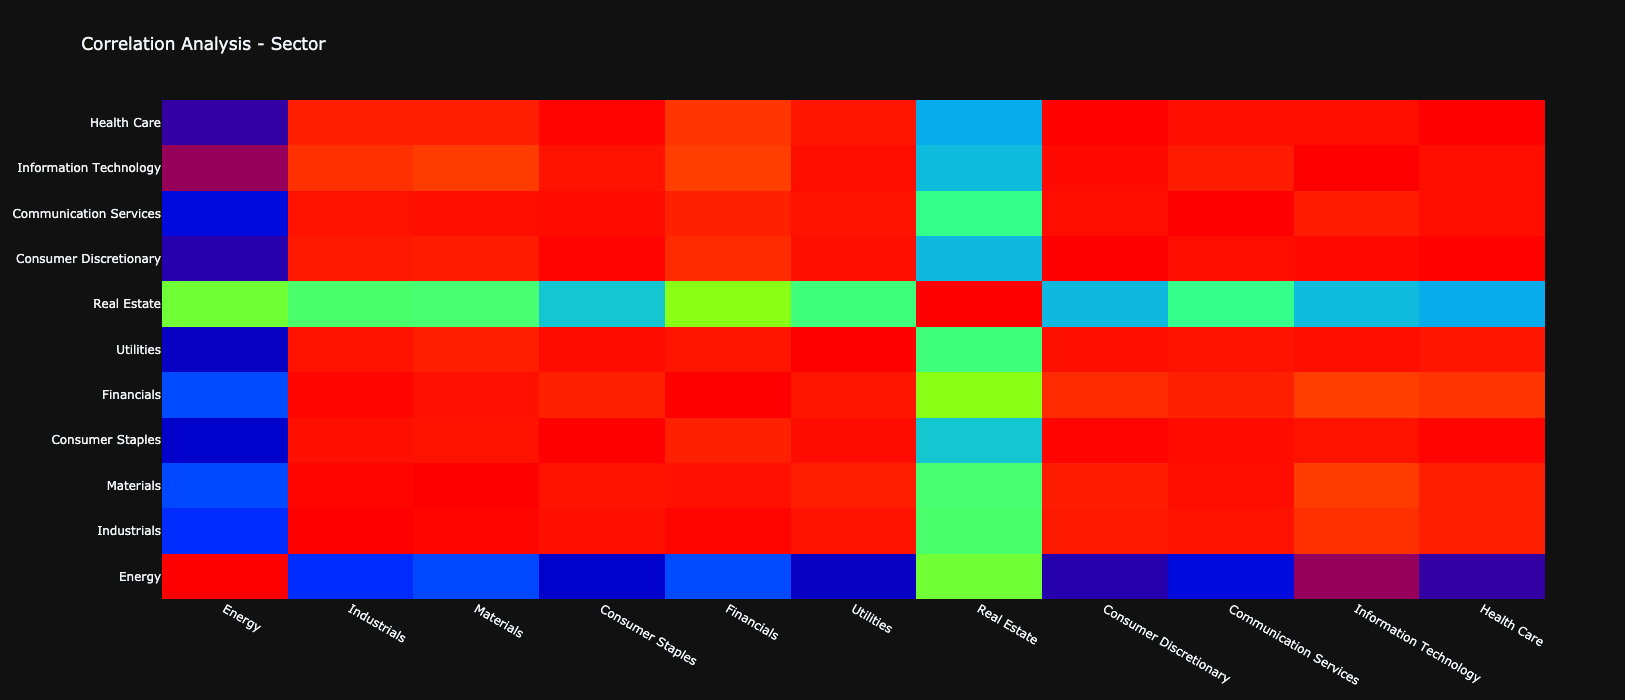

In [116]:
corr_df_heatmap = go.Heatmap(z=[corr_df[col].to_list() for col in corr_df.columns],type = 'heatmap', colorscale='Rainbow',  x = corr_df.index, y=corr_df.index, name='', showscale= False)
layout = go.Layout(title='Correlation Analysis - Sector', width = 1000, height = 700) #, template='plotly_dark')

fig = go.Figure()
fig.add_traces(corr_df_heatmap)
fig.update_layout(layout)
fig.layout.template = 'plotly_dark'
fig.show()

#Greys,YlGnBu,Greens,YlOrRd,Bluered,RdBu,Reds,Blues,Picnic,Rainbow,Portland,Jet,Hot,Blackbody,Earth,Electric,Viridis,Cividis


,Sector,Sub Industry,Name,Price,Dividend Yield,Market Cap ($M),Forward P/E Ratio,Payout Ratio,Beta
Ticker,,,,,,,,,
A,Health Care,Health Care Equipment,"Agilent Technologies, Inc.",74.56,0.009055,2.297920e+04,30.44,0.274331,0.960773
AAL,Industrials,Airlines,"American Airlines Group, Inc.",9.81,0.037594,4.499603e+03,-5.28,-0.215088,1.298470
AAP,Consumer Discretionary,Automotive Retail,"Advance Auto Parts, Inc.",120.11,0.002058,8.055087e+03,17.49,0.034951,0.997614
AAPL,Information Technology,"Technology Hardware, Storage & Peripherals","Apple, Inc.",293.54,0.010655,1.264820e+06,22.79,0.239474,1.160621
ABBV,Health Care,Pharmaceuticals,"AbbVie, Inc.",81.86,0.054322,1.223273e+05,NaN,NaN,0.790977


In [23]:
sector_count = sp.groupby(['Sector'])['Name'].count().to_frame('Count').reset_index().sort_values('Count')
sector_count

,Sector,Count
0,Communication Services,26
3,Energy,27
8,Materials,28
10,Utilities,28
9,Real Estate,31
2,Consumer Staples,33
5,Health Care,60
1,Consumer Discretionary,63
4,Financials,66
7,Information Technology,71


In [29]:
sector_count_bar = go.Bar(x=sector_count['Sector'], y=sector_count['Count'],text=sector_count['Count'],textposition='auto', marker_color='crimson')

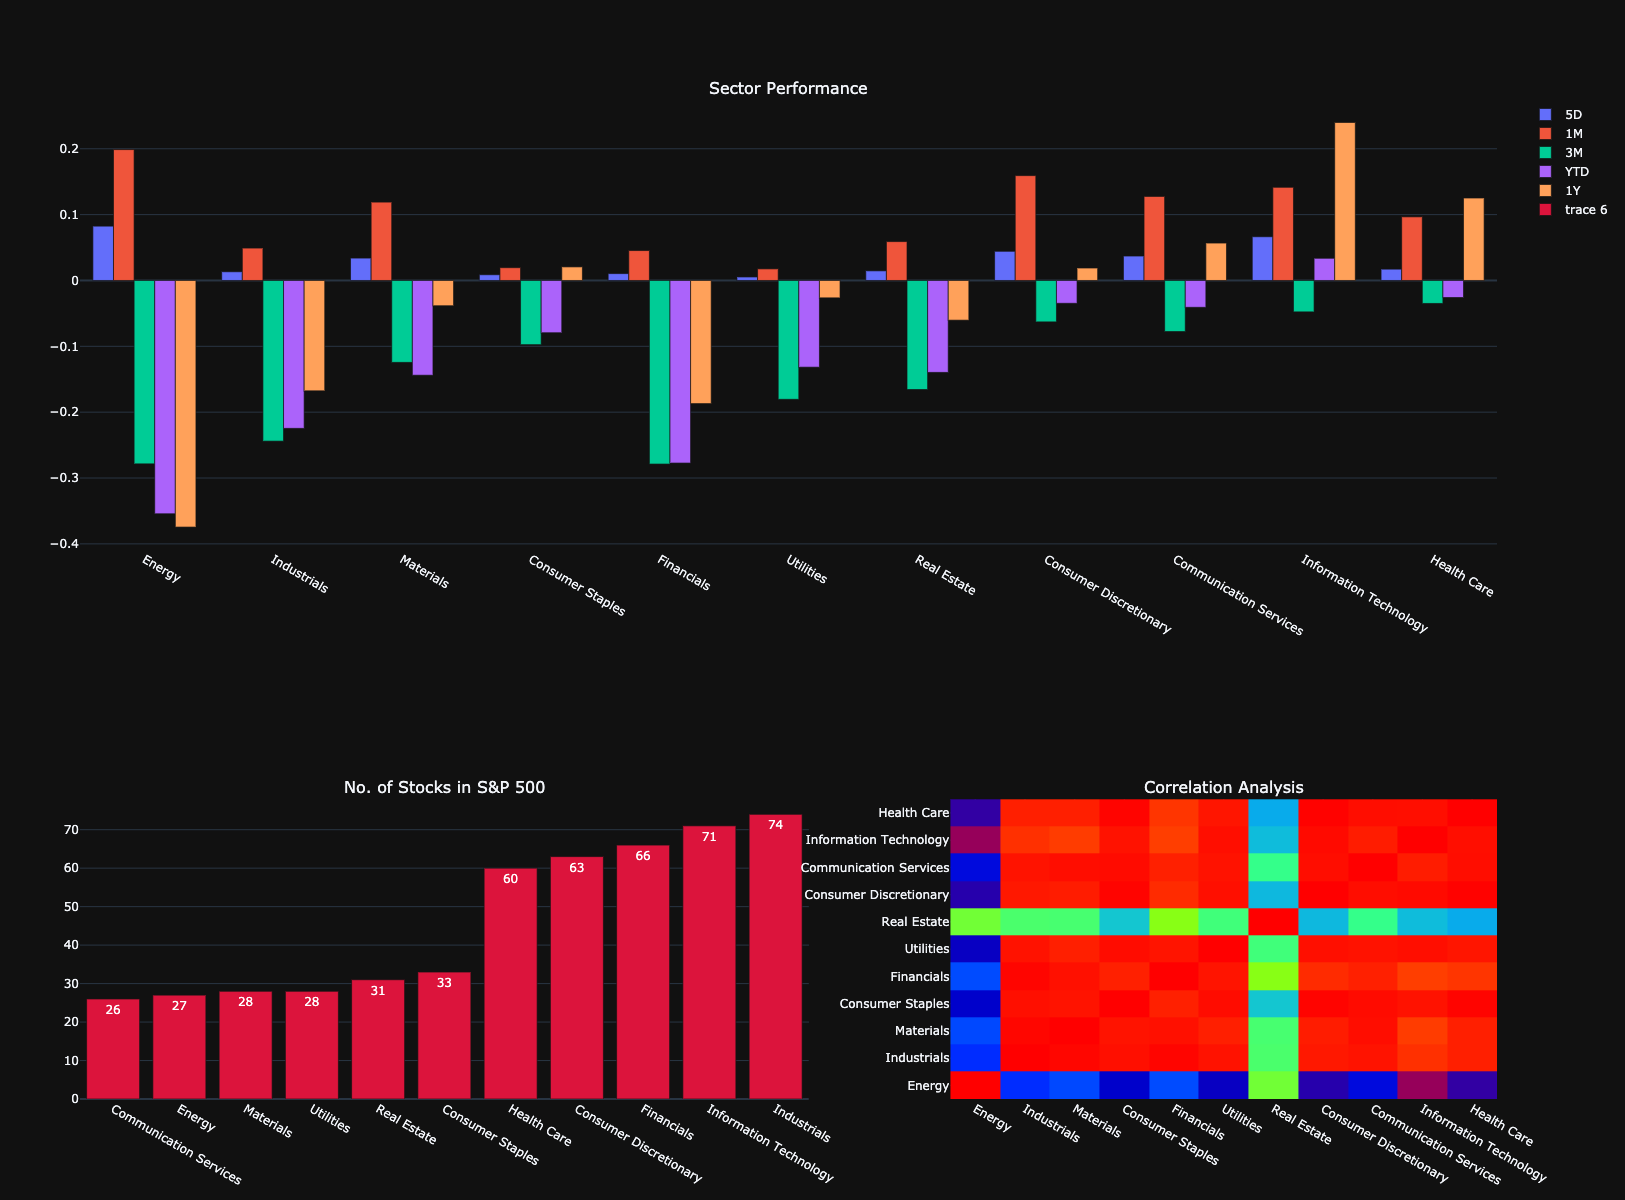

In [117]:
def get_sector_Performance_figure():
    global sector_bar
    fig = make_subplots(
        rows=2, cols=2,
        column_widths=[0.4,0.3],
        row_heights=[0.6, 0.4],
        specs=[[{"colspan": 2}, None], [{}, {}]],
        subplot_titles=("Sector Performance","No. of Stocks in S&P 500", "Correlation Analysis"))

    for bar in sector_bar:
        fig.add_trace(bar, row=1, col=1)

    fig.add_trace(corr_df_heatmap, row=2, col=2)

    fig.add_trace(sector_count_bar, row=2, col=1)

    fig.update_layout(
        template="plotly_dark",
        height=1200, width=1600,
        #showlegend=False
    )

    #fig.update_layout( title_text="specs examples")
    return fig

get_sector_Performance_figure().show()

In [43]:
sector_list = sp.Sector.dropna().unique().tolist()

In [51]:
def get_stock_figure(value):
    
    fig = go.Figure() 
    data = sp.groupby(['Sector']).get_group(value)
    
    trace_bar = go.Bar(x=data.index, y=data['Beta'], name='Stocks')

    trace_line = go.Line(x=[data.index[0], data.index[-1]], y=[1,1], name='S&P 500')
    
    fig.add_traces(data=[trace_bar, trace_line])

    fig.layout.template='plotly_dark'
    
    return fig


In [118]:
from jupyter_plotly_dash import JupyterDash

import dash
import dash_html_components as html
import dash_core_components as dcc

app = JupyterDash('SimpleExample')



#app = dash.Dash(__name__, )
app.layout = html.Div([
    html.H2('Sector Analysis'),
    html.Div([
        dcc.Dropdown(
        id='sector-dropdown',
        options=[{'label': i,'value': i} for i in sector_list],
        value='Health Care')], 
        style={'width': '45%',
               'display': 'inline-block'}),
    html.Div(id='sector-analysis-container'),

])



@app.callback(
    dash.dependencies.Output('sector-analysis-container', 'children'),
    [dash.dependencies.Input('sector-dropdown', 'value')])
def update_output(value):
    
    return [dcc.Graph(figure=get_stock_figure(value))]


app

In [166]:
end = datetime.datetime.now()
start = datetime.datetime(end.year - 5, end.month , end.day)
master_df = None

ticker_list = sp.index.to_list()


button = list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])

In [161]:
def get_stock_data(ticker):
    #return ((1 + web.DataReader(ticker, 'yahoo', start, end)['Close'].pct_change().dropna().sort_index()).cumprod()-1).reset_index().rename({'Close':ticker},axis=1)
    return web.DataReader(ticker, 'yahoo', start, end)['Close'].reset_index().rename({'Close':ticker},axis=1)

def get_master_df(ticker):
    global master_df
    if master_df is None:
        master_df = get_stock_data(ticker)
        #master_df.set_index('Date', inplace=True)
    else:
        if ticker not in master_df:
            df = get_stock_data(ticker)
            master_df = pd.merge(master_df, df, on='Date')
    return master_df


In [188]:
def get_time_series_figure(value):
    global master_df, button
    plot = []
    if value==None or len(value)==0:
        return go.Figure(layout={'template':'plotly'})
    
    for ticker in value:
        master_df = get_master_df(ticker)
        plot.append(go.Scatter(x=master_df['Date'], y=master_df[ticker], name=ticker))
                    
    fig = go.Figure(plot) 
    fig.update_xaxes(rangeslider=dict(visible=True, bgcolor='white'),rangeselector=dict(buttons=button, bgcolor='blue'))
    fig.layout(xaxis_title="Date", yaxis_title="Price", template='plotly_dark')
    return fig


In [ ]:
go.Figure(layout={'template':'plotly_dark'})

In [189]:
from jupyter_plotly_dash import JupyterDash

import dash
import dash_html_components as html
import dash_core_components as dcc

app = JupyterDash('SimpleExample')



#app = dash.Dash(__name__, )
app.layout = html.Div([
    html.H2('Time Series Analysis'),
    html.Div([dcc.Dropdown(
        id='stock-dropdown',
        options=[{'label': i,'value': i} for i in ticker_list],
        multi=True,
        style={'color':'black'})],
    style={'width': '45%','display': 'inline-block'}),
    html.Div(id='close-stock-container'),
    html.Div(id='pct-stock-container')
])



@app.callback(
    dash.dependencies.Output('close-stock-container', 'children'),
    [dash.dependencies.Input('stock-dropdown', 'value')])
def update_output(value):
    
    return [dcc.Graph(figure=get_time_series_figure(value))]

app

In [183]:
from jupyter_plotly_dash import JupyterDash

import dash
import dash_html_components as html
import dash_core_components as dcc

app = JupyterDash('SimpleExample')

master_df=None
page_style = {'background-color':'black', 'color':'white', 'padding':'15px'}
tabs_colors={
        "border": "white",
        "primary": "black",
        "background": "black",
        'color':'black'
    }

sector_performance_div = html.Div([html.H2('Sector Performance Analysis'), dcc.Graph(figure=get_sector_Performance_figure())])

sector_div = html.Div([
    html.H2('Sector Analysis'),
    html.Div([
        dcc.Dropdown(
        id='sector-dropdown',
        options=[{'label': i,'value': i} for i in sector_list],
        value='Health Care', style={'color':'black'})], 
        style={'width': '45%','display': 'inline-block'}),
    html.Div(id='sector-analysis-container'),

])

#app = dash.Dash(__name__, )
stock_div = html.Div([
    html.H2('Time Series Analysis'),
    html.Div([dcc.Dropdown(
        id='stock-dropdown',
        options=[{'label': i,'value': i} for i in ticker_list],
        multi=True,
        style={'color':'black'})],
    style={'width': '45%','display': 'inline-block'}),
    html.Div(id='close-stock-container'),
    html.Div(id='pct-stock-container')
])


app.layout = html.Div([
    html.H1('S&P 500'),
    dcc.Tabs(
        id="tabs-with-classes",
        value='tab-1',
        parent_className='custom-tabs',
        className='custom-tabs-container',
        children=[
            dcc.Tab(
                label='Sector',
                value='tab-1',
                className='custom-tab',
                selected_className='custom-tab--selected',
                children=sector_performance_div
            ),
            dcc.Tab(
                label='Stock',
                value='tab-2',
                className='custom-tab',
                selected_className='custom-tab--selected',
                children=[sector_div, stock_div]
            )
        ], style=tabs_colors),
    html.Div(id='tabs-content-classes')
], style=page_style)


@app.callback(
    dash.dependencies.Output('sector-analysis-container', 'children'),
    [dash.dependencies.Input('sector-dropdown', 'value')])
def update_output(value):
    
    return [dcc.Graph(figure=get_stock_figure(value))]



@app.callback(
    dash.dependencies.Output('close-stock-container', 'children'),
    [dash.dependencies.Input('stock-dropdown', 'value')])
def update_output(value):
    
    return [dcc.Graph(figure=get_time_series_figure(value))]


app